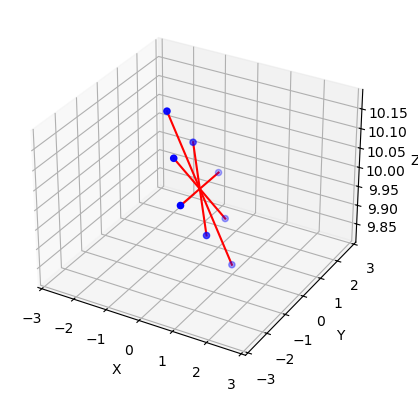

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the coordinates of the motors (x, y, z)
# Replace these coordinates with your actual data
l = 0.635
angle = np.pi / 8
motors = np.array([
    [1, 0, 0],
    [0.5, 0.5, 0],
    [0, 1, 0],
    [-0.5, 0.5, 0],
    [-1, 0, 0],
    [-0.5, -0.5, 0],
    [0, -1, 0],
    [0.5, -0.5, 0]
])

# Define the roll, pitch, and yaw angles
# Replace these angles with your actual data
roll = np.deg2rad(0)  # Example roll angle (in radians)
pitch = np.deg2rad(10)  # Example pitch angle (in radians)
yaw = np.deg2rad(0)  # Example yaw angle (in radians)

# Define transformation matrices
R_roll = np.array([
    [1, 0, 0],
    [0, np.cos(roll), -np.sin(roll)],
    [0, np.sin(roll), np.cos(roll)]
])

R_pitch = np.array([
    [np.cos(pitch), 0, np.sin(pitch)],
    [0, 1, 0],
    [-np.sin(pitch), 0, np.cos(pitch)]
])

R_yaw = np.array([
    [np.cos(yaw), -np.sin(yaw), 0],
    [np.sin(yaw), np.cos(yaw), 0],
    [0, 0, 1]
])

# Combine rotation matrices
R = np.dot(R_yaw, np.dot(R_pitch, R_roll))

shift = np.array([0,0,10])
# Transform motor coordinates
transformed_motors = np.dot(R, motors.T).T + shift

# Plot the UAV object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot motors
ax.scatter(transformed_motors[:, 0], transformed_motors[:, 1], transformed_motors[:, 2], color='b')

# Connect motors to form the UAV body
for i in range(8):
    ax.plot([shift[0], transformed_motors[(i + 1) % 8, 0]],
            [shift[1], transformed_motors[(i + 1) % 8, 1]],
            [shift[2], transformed_motors[(i + 1) % 8, 2]], color='r')


# Set plot limits and labels
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([shift[2]-1, shift[2]+1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
